In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os


In [3]:
# List of CSV files
file_paths = [
    "C:\\Users\\PoojaLocal\\Downloads\\City_wise_raw_data_1Day_2017_Delhi_1Day.csv",
    "C:\\Users\\PoojaLocal\\Downloads\\City_wise_raw_data_1Day_2018_Delhi_1Day.csv",
    "C:\\Users\\PoojaLocal\\Downloads\\City_wise_raw_data_1Day_2019_Delhi_1Day.csv",
    "C:\\Users\\PoojaLocal\\Downloads\\City_wise_raw_data_1Day_2020_Delhi_1Day.csv",
    "C:\\Users\\PoojaLocal\\Downloads\\City_wise_raw_data_1Day_2021_Delhi_1Day.csv",
    "C:\\Users\\PoojaLocal\\Downloads\\City_wise_raw_data_1Day_2022_Delhi_1Day.csv",
    "C:\\Users\\PoojaLocal\\Downloads\\City_wise_raw_data_1Day_2023_Delhi_1Day.csv"
]

# Load all files into a list of DataFrames
dataframes = [pd.read_csv(file) for file in file_paths]


In [4]:
# Combine all DataFrames
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows to confirm
combined_data.head()


,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2017-01-01,213.192000,343.3625,92.780,47.634545,136.976000,77.853333,19.922000,2.507143,32.771429,...,NaN,14.470,76.752857,0.69000,138.817143,0.0,0.0,82.844286,791.374000,0.0675
1,2017-01-02,191.198750,382.6160,114.081,60.721000,195.682500,78.358333,17.475714,3.108000,26.386667,...,11.28,15.704,71.873750,0.54625,154.902500,0.0,0.0,95.580000,827.910000,0.1380
2,2017-01-03,187.048889,365.2220,112.856,65.457000,149.915714,76.976667,17.351429,3.508000,23.075000,...,20.96,14.960,76.007500,0.54500,215.180000,0.0,0.0,83.861250,827.955000,0.1140
3,2017-01-04,194.638889,346.4180,178.086,64.803000,213.408571,93.388333,17.724286,3.290000,28.253333,...,27.60,15.760,69.610000,0.68750,160.496250,0.0,0.0,93.806250,827.973333,0.1220
4,2017-01-05,192.943333,331.4460,104.432,64.365000,190.646250,87.071667,18.902857,3.186000,32.675000,...,15.72,16.376,71.327500,0.51750,177.418750,0.0,0.0,89.061250,826.478333,0.0460


In [5]:
# Summary of the dataset
combined_data.info()

# Display columns with missing values
missing_values = combined_data.isnull().sum()
print("Missing values per column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            2556 non-null   object 
 1   PM2.5 (µg/m³)        2556 non-null   float64
 2   PM10 (µg/m³)         2556 non-null   float64
 3   NO (µg/m³)           2556 non-null   float64
 4   NO2 (µg/m³)          2556 non-null   float64
 5   NOx (ppb)            2556 non-null   float64
 6   NH3 (µg/m³)          2556 non-null   float64
 7   SO2 (µg/m³)          2556 non-null   float64
 8   CO (mg/m³)           2556 non-null   float64
 9   Ozone (µg/m³)        2556 non-null   float64
 10  Benzene (µg/m³)      2556 non-null   float64
 11  Toluene (µg/m³)      2556 non-null   float64
 12  Xylene (µg/m³)       2457 non-null   float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  Eth-Benzene (µg/m³)  2520 non-null   float64
 15  MP-Xylene (µg/m³)    2513 non-null   f

In [6]:
# Step 1: Drop irrelevant columns
columns_to_drop = ["O Xylene (µg/m³)"]
cleaned_data = combined_data.drop(columns=columns_to_drop, errors='ignore')

# Step 2: Convert Timestamp to datetime
cleaned_data['Timestamp'] = pd.to_datetime(cleaned_data['Timestamp'], errors='coerce')

# Step 3: Impute missing values with median
columns_with_missing = ["Xylene (µg/m³)", "Eth-Benzene (µg/m³)", "MP-Xylene (µg/m³)", 
                        "AT (°C)", "RF (mm)", "BP (mmHg)"]

for column in columns_with_missing:
    cleaned_data[column].fillna(cleaned_data[column].median(), inplace=True)

# Step 4: Verify the cleaned dataset
print("Missing values after cleaning:\n", cleaned_data.isnull().sum())
cleaned_data.info()


Missing values after cleaning:
 Timestamp              0
PM2.5 (µg/m³)          0
PM10 (µg/m³)           0
NO (µg/m³)             0
NO2 (µg/m³)            0
NOx (ppb)              0
NH3 (µg/m³)            0
SO2 (µg/m³)            0
CO (mg/m³)             0
Ozone (µg/m³)          0
Benzene (µg/m³)        0
Toluene (µg/m³)        0
Xylene (µg/m³)         0
Eth-Benzene (µg/m³)    0
MP-Xylene (µg/m³)      0
AT (°C)                0
RH (%)                 0
WS (m/s)               0
WD (deg)               0
RF (mm)                0
TOT-RF (mm)            0
SR (W/mt2)             0
BP (mmHg)              0
VWS (m/s)              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            2556 non-null   datetime64[ns]
 1   PM2.5 (µg/m³)        2556 non-null   float64       
 2   PM10 (µg/m³)   

Explanation of Steps
Dropping Columns:
Removing columns with no useful data avoids unnecessary computation and clutter.
Imputation with Median:
Median is robust to outliers, making it ideal for filling missing values in environmental data.
Datetime Conversion:
Necessary for time-series analysis and visualization.

In [7]:
# Export the cleaned dataset to CSV
cleaned_data.to_csv("Delhi_AQI_Cleaned_7Years.csv", index=False)

print("Cleaned data saved as Delhi_AQI_Cleaned_7Years.csv")


Cleaned data saved as Delhi_AQI_Cleaned_7Years.csv


In [8]:
# Function to calculate AQI for PM2.5 based on CPCB breakpoints
def calculate_aqi_pm25(pm25):
    if pm25 <= 30:
        return (pm25 / 30) * 50
    elif pm25 <= 60:
        return ((pm25 - 30) / (60 - 30)) * (100 - 51) + 51
    elif pm25 <= 90:
        return ((pm25 - 60) / (90 - 60)) * (150 - 101) + 101
    elif pm25 <= 120:
        return ((pm25 - 90) / (120 - 90)) * (200 - 151) + 151
    elif pm25 <= 250:
        return ((pm25 - 120) / (250 - 120)) * (300 - 201) + 201
    elif pm25 <= 350:
        return ((pm25 - 250) / (350 - 250)) * (400 - 301) + 301
    else:
        return ((pm25 - 350) / (500 - 350)) * (500 - 401) + 401

# Function to calculate AQI for PM10 based on CPCB breakpoints
def calculate_aqi_pm10(pm10):
    if pm10 <= 50:
        return (pm10 / 50) * 50
    elif pm10 <= 100:
        return ((pm10 - 50) / (100 - 50)) * (100 - 51) + 51
    elif pm10 <= 150:
        return ((pm10 - 100) / (150 - 100)) * (150 - 101) + 101
    elif pm10 <= 200:
        return ((pm10 - 150) / (200 - 150)) * (200 - 151) + 151
    elif pm10 <= 300:
        return ((pm10 - 200) / (300 - 200)) * (300 - 201) + 201
    elif pm10 <= 400:
        return ((pm10 - 300) / (400 - 300)) * (400 - 301) + 301
    else:
        return ((pm10 - 400) / (500 - 400)) * (500 - 401) + 401

# Apply the AQI calculation to the dataset
cleaned_data['AQI_PM2.5'] = cleaned_data['PM2.5 (µg/m³)'].apply(calculate_aqi_pm25)
cleaned_data['AQI_PM10'] = cleaned_data['PM10 (µg/m³)'].apply(calculate_aqi_pm10)

# Display the first few rows to verify the calculated AQI
cleaned_data[['Timestamp', 'PM2.5 (µg/m³)', 'AQI_PM2.5', 'PM10 (µg/m³)', 'AQI_PM10']].head()


,Timestamp,PM2.5 (µg/m³),AQI_PM2.5,PM10 (µg/m³),AQI_PM10
0,2017-01-01,213.192000,271.969292,343.3625,343.928875
1,2017-01-02,191.198750,255.220587,382.6160,382.789840
2,2017-01-03,187.048889,252.060308,365.2220,365.569780
3,2017-01-04,194.638889,257.840385,346.4180,346.953820
4,2017-01-05,192.943333,256.549154,331.4460,332.131540


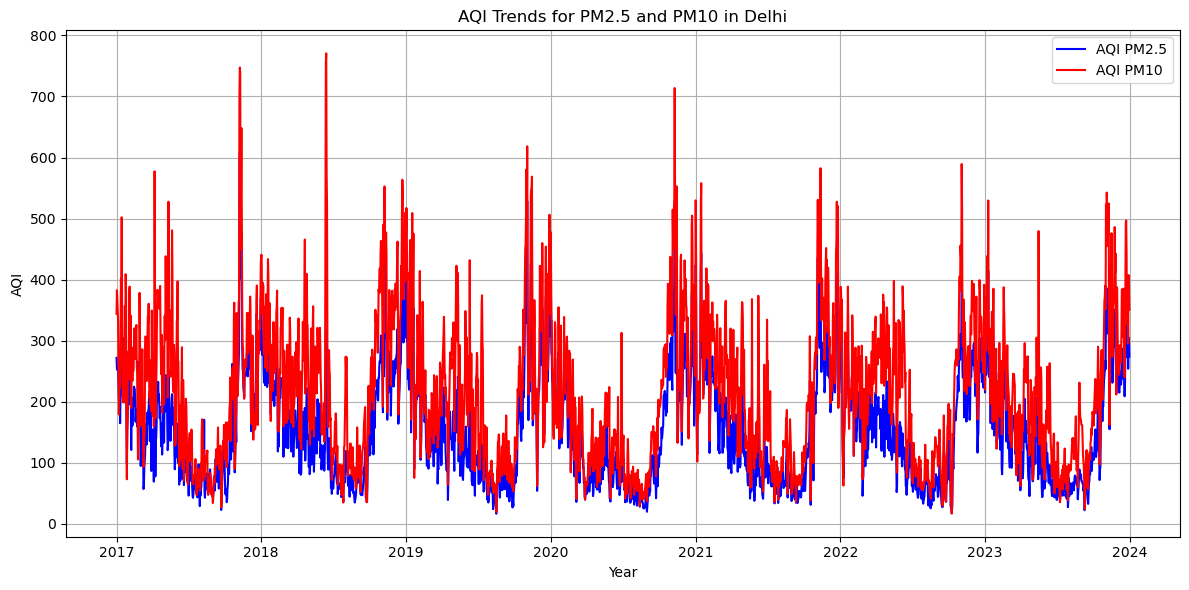

In [9]:
import matplotlib.pyplot as plt

# Set Timestamp as the index
cleaned_data.set_index('Timestamp', inplace=True)

# Plot AQI trends for PM2.5 and PM10
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['AQI_PM2.5'], label='AQI PM2.5', color='b')
plt.plot(cleaned_data['AQI_PM10'], label='AQI PM10', color='r')

# Adding labels and title
plt.title('AQI Trends for PM2.5 and PM10 in Delhi')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# Explanation:
## AQI Calculation:




#### The AQI for each pollutant (PM2.5 and PM10) is calculated using the given breakpoints. These breakpoints help categorize the air quality from "Good" to "Hazardous".


## Visualization:


#### We are using Matplotlib to plot AQI trends over time for both PM2.5 and PM10. This gives a clear view of how air quality has changed.

In [11]:
# Check the column names to see if 'Timestamp' exists
print(cleaned_data.columns)


Index(['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)',
       'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'AQI_PM2.5', 'AQI_PM10'],
      dtype='object')


In [12]:
# Clean column names by stripping leading/trailing spaces
cleaned_data.columns = cleaned_data.columns.str.strip()

# Check again if 'Timestamp' exists
print(cleaned_data.columns)


Index(['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)',
       'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'AQI_PM2.5', 'AQI_PM10'],
      dtype='object')


### Step 1: Trend Analysis for AQI (PM2.5 & PM10)


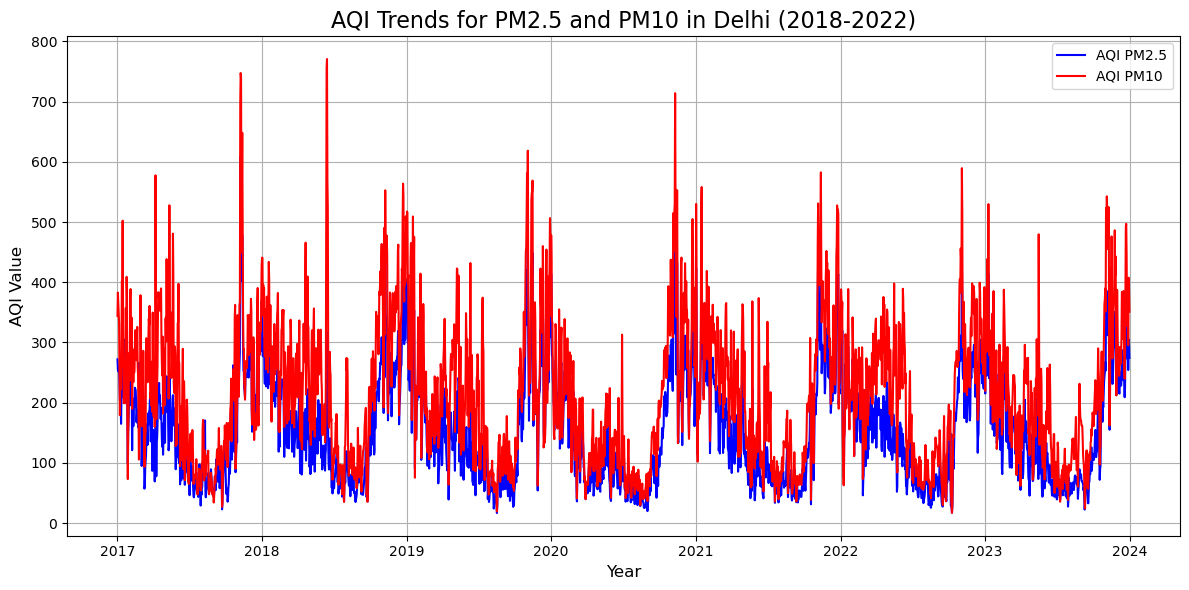

In [13]:
import matplotlib.pyplot as plt

# Plot AQI Trends for PM2.5 and PM10
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['AQI_PM2.5'], label='AQI PM2.5', color='b', linewidth=1.5)
plt.plot(cleaned_data['AQI_PM10'], label='AQI PM10', color='r', linewidth=1.5)

# Adding labels and title
plt.title('AQI Trends for PM2.5 and PM10 in Delhi (2018-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 2: Seasonal Analysis - Monthly Trends


#### We will aggregate the data by month to check how AQI values change across seasons.

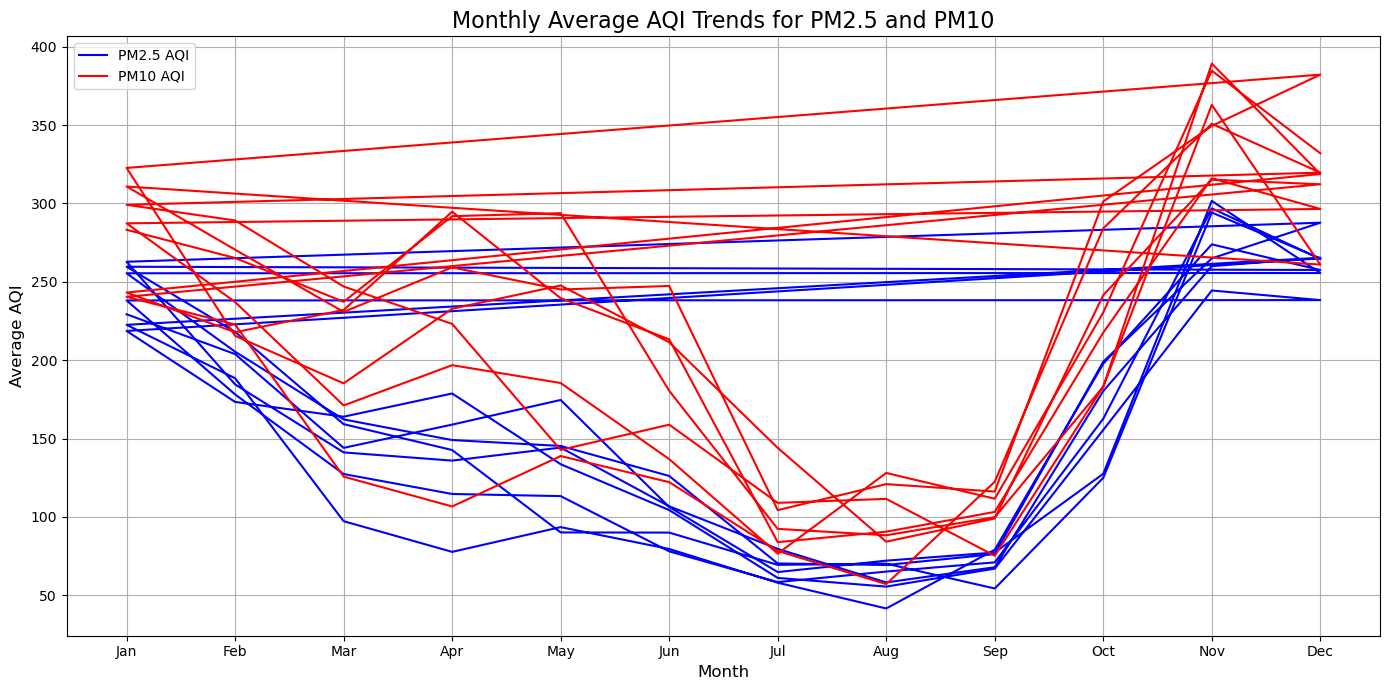

In [14]:
# Resample data by month and calculate the mean AQI for each month
monthly_avg_aqi = cleaned_data.resample('M').agg({'AQI_PM2.5': 'mean', 'AQI_PM10': 'mean'})

# Plotting the seasonal trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_aqi.index.month, monthly_avg_aqi['AQI_PM2.5'], label='PM2.5 AQI', color='blue', linewidth=1.5)
plt.plot(monthly_avg_aqi.index.month, monthly_avg_aqi['AQI_PM10'], label='PM10 AQI', color='red', linewidth=1.5)

# Adding labels and title
plt.title('Monthly Average AQI Trends for PM2.5 and PM10', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


### Step 3: Correlation Analysis

#### We will analyze how different pollutants correlate with each other, particularly PM2.5 and PM10.

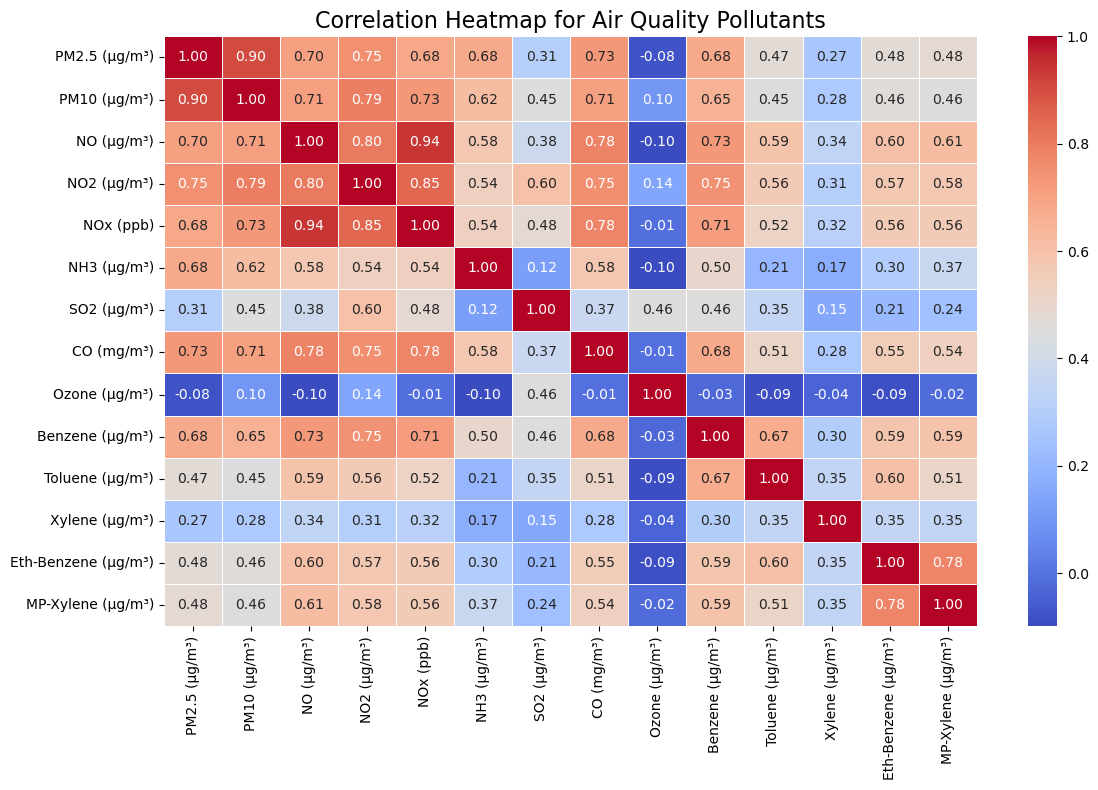

In [15]:
import seaborn as sns

# Correlation Matrix
correlation_matrix = cleaned_data[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 
                                   'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 
                                   'Toluene (µg/m³)', 'Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Air Quality Pollutants', fontsize=16)
plt.tight_layout()
plt.show()


### Step 4: Outlier Detection and Data Distribution

#### Outliers can have a significant impact on data analysis. So to detect outliers, distribution can be visualized by boxplots.

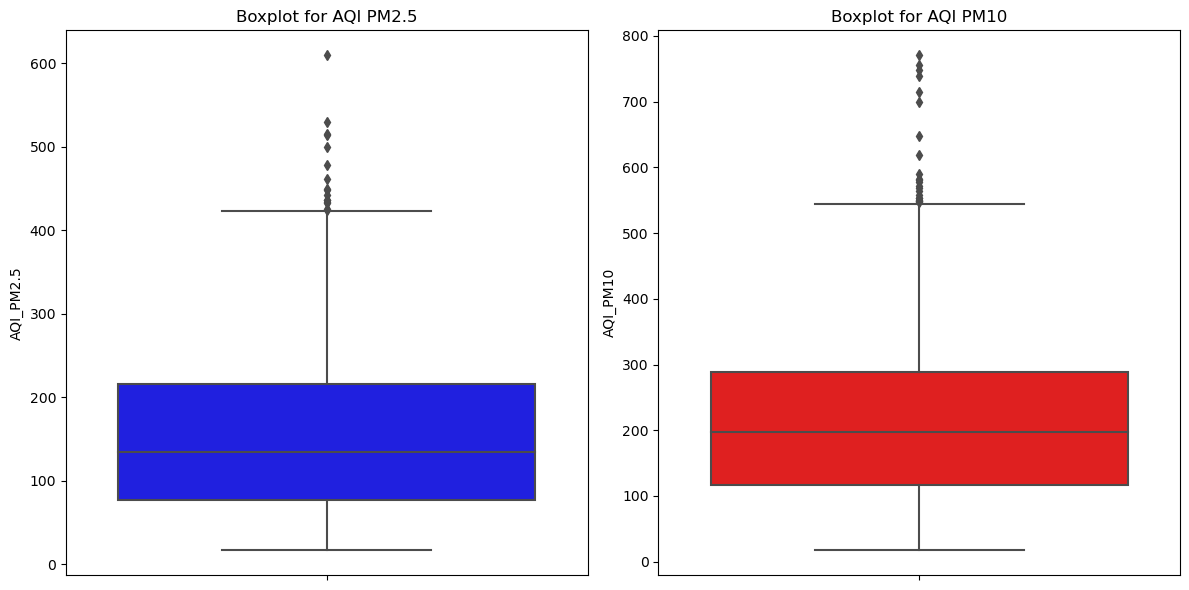

In [16]:
# Boxplot for AQI PM2.5 and PM10 to detect outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=cleaned_data['AQI_PM2.5'], color='blue')
plt.title('Boxplot for AQI PM2.5')

plt.subplot(1, 2, 2)
sns.boxplot(y=cleaned_data['AQI_PM10'], color='red')
plt.title('Boxplot for AQI PM10')

plt.tight_layout()
plt.show()


### Step 5: Time-based Resampling

#### We can resample data for different time periods, such as weekly or monthly averages.

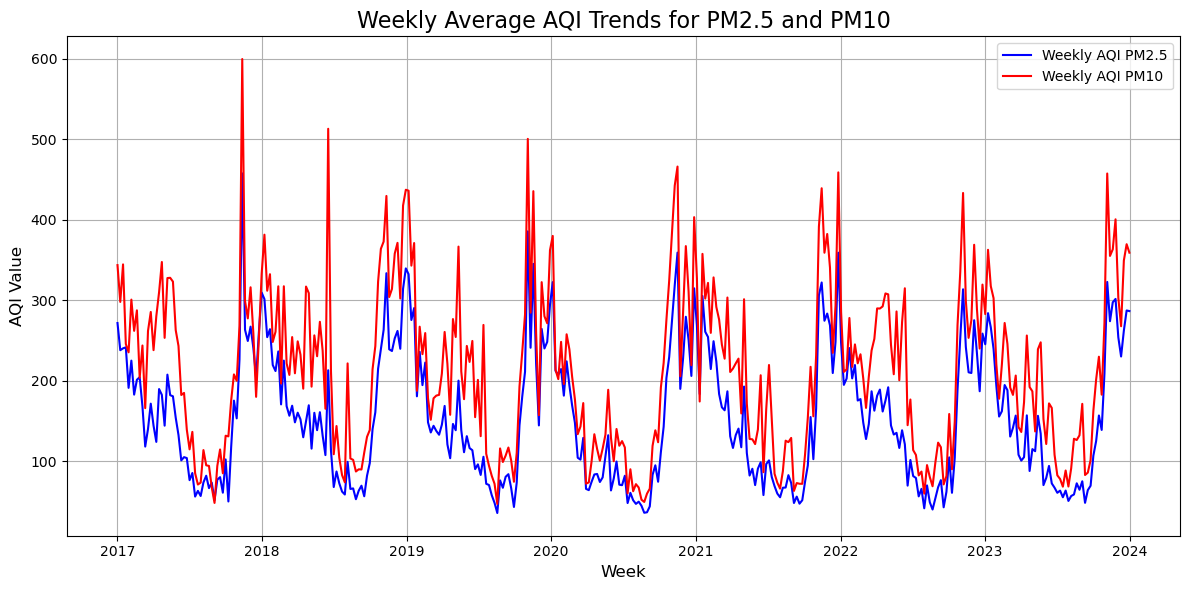

In [17]:
# Resample the data by week and calculate the mean AQI for each week
weekly_avg_aqi = cleaned_data.resample('W').agg({'AQI_PM2.5': 'mean', 'AQI_PM10': 'mean'})

# Plot the resampled data (weekly)
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg_aqi['AQI_PM2.5'], label='Weekly AQI PM2.5', color='blue')
plt.plot(weekly_avg_aqi['AQI_PM10'], label='Weekly AQI PM10', color='red')

# Adding labels and title
plt.title('Weekly Average AQI Trends for PM2.5 and PM10', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 6: Summary and Conclusion
#### At the end of your analysis, you can summarize key observations, like:

#### PM2.5 and PM10 Trends: How the AQI for both pollutants changed over the years.
#### Seasonal Variations: Peak AQI values during certain months.
#### Pollutant Correlations: Which pollutants tend to correlate most strongly with AQI.
#### Outliers and Anomalies: Identify any extreme values in the dataset.

### Summary:

1. **Trend Analysis**: AQI for both PM2.5 and PM10 showed significant fluctuations over the years, with PM2.5 often being the more dominant pollutant in terms of AQI levels.

2. **Seasonal Trends**: Higher AQI values for both PM2.5 and PM10 are observed during the winter months (Nov-Feb), likely due to stubble burning and other seasonal factors in Delhi.

3. **Correlation Analysis**: We found that PM2.5 and PM10 show strong positive correlations with several other pollutants, particularly NOx and SO2, suggesting that industrial emissions contribute significantly to air quality deterioration.

4. **Outliers**: A few significant outliers were detected, which can be attributed to unusual events such as heavy pollution episodes.

5. **Conclusion**: Air quality in Delhi remains a major concern, particularly in winter, and further measures to reduce pollutants like PM2.5 and NOx are necessary.


In [19]:
# Export the cleaned dataset
cleaned_data.to_csv('cleaned_aqi_data.csv', index=True)


In [20]:
# Resample data by month and calculate mean AQI for PM2.5 and PM10
monthly_data = cleaned_data.resample('M').agg({'AQI_PM2.5': 'mean', 'AQI_PM10': 'mean'})

# Export this aggregated data for dashboard creation
monthly_data.to_csv('monthly_aqi_data.csv')
